In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('Expander_data.csv')

In [3]:
df.shape

(296450, 9)

In [4]:
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [5]:
df.isnull().sum()

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [6]:
#dropping 'Run Status' as it has not information.
df.drop('Run Status',axis=1,inplace=True)

In [7]:
df.corr()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
Suction Pressure (psig),1.000000,0.862881,-0.873558,-0.371829,0.089420,0.905435,0.862876
Suction Temperature (F),0.862881,1.000000,-0.938631,-0.500437,0.349575,0.960071,0.999993
Total Flow (gpm),-0.873558,-0.938631,1.000000,0.484320,-0.274621,-0.973483,-0.938624
Speed (rpm),-0.371829,-0.500437,0.484320,1.000000,0.175187,-0.434955,-0.500435
By-pass Valve Position (%),0.089420,0.349575,-0.274621,0.175187,1.000000,0.400566,0.349572
Discharge Pressure (psig),0.905435,0.960071,-0.973483,-0.434955,0.400566,1.000000,0.960065
Discharge Temperature (F),0.862876,0.999993,-0.938624,-0.500435,0.349572,0.960065,1.000000


In [8]:
#data seems to be distributed normally.
df.skew()

Suction Pressure (psig)       0.356743
Suction Temperature (F)       0.154379
Total Flow (gpm)             -0.423595
Speed (rpm)                  -0.080784
By-pass Valve Position (%)    0.847692
Discharge Pressure (psig)     0.334584
Discharge Temperature (F)     0.154377
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226E5C197F0>,
      dtype=object)

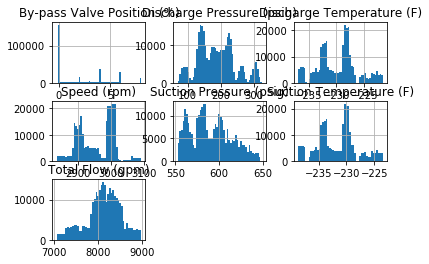

In [9]:
df.hist(bins=50)

In [10]:
df.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102


In [11]:
df.dtypes

Timestamp                      object
Suction Pressure (psig)       float64
Suction Temperature (F)       float64
Total Flow (gpm)              float64
Speed (rpm)                   float64
By-pass Valve Position (%)    float64
Discharge Pressure (psig)     float64
Discharge Temperature (F)     float64
dtype: object

#converting timestamp column to datetime data and saperating year, month, day and date info and storing it in different columns.

In [12]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['month'] = pd.DatetimeIndex(df['Timestamp']).month
df['year']=pd.DatetimeIndex(df['Timestamp']).year
df['day']=pd.DatetimeIndex(df['Timestamp']).day
df['time']=pd.DatetimeIndex(df['Timestamp']).hour
df.drop('Timestamp',axis=1,inplace=True)

In [13]:
df.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),month,year,day,time
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,1,2020,4,21
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,1,2020,4,21
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,1,2020,4,21
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,1,2020,4,21
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,1,2020,4,21


In [14]:
df.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),month,year,day,time
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.0,296450.000000,296450.000000
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,2.117996,2020.0,13.062203,11.459673
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,1.340313,0.0,8.481266,6.940272
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,1.000000,2020.0,1.000000,0.000000
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,1.000000,2020.0,6.000000,5.000000
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,1.000000,2020.0,12.000000,11.000000
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,4.000000,2020.0,19.000000,17.000000
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,4.000000,2020.0,31.000000,23.000000


#since there is no variation in the year variable I have decided to drop it.

In [15]:
df.drop('year',axis=1,inplace=True)

In [16]:
#let's check for the variance in other columns
df.var()

Suction Pressure (psig)          539.008276
Suction Temperature (F)           12.774243
Total Flow (gpm)              158443.429510
Speed (rpm)                     2937.798978
By-pass Valve Position (%)         6.192970
Discharge Pressure (psig)       3159.022594
Discharge Temperature (F)         12.774452
month                              1.796439
day                               71.931877
time                              48.167376
dtype: float64

#labelencoding the discrete data

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encode=['month','day','time']
for m in encode:
    df[m]=le.fit_transform(df[m].values.reshape(-1,1))

In [18]:
corr=df.corr()

In [19]:
corr

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),month,day,time
Suction Pressure (psig),1.000000,0.862881,-0.873558,-0.371829,0.089420,0.905435,0.862876,-0.035956,0.349089,0.002066
Suction Temperature (F),0.862881,1.000000,-0.938631,-0.500437,0.349575,0.960071,0.999993,-0.135734,0.409361,-0.003006
Total Flow (gpm),-0.873558,-0.938631,1.000000,0.484320,-0.274621,-0.973483,-0.938624,0.197153,-0.414223,0.000870
Speed (rpm),-0.371829,-0.500437,0.484320,1.000000,0.175187,-0.434955,-0.500435,0.628790,-0.644425,-0.012840
By-pass Valve Position (%),0.089420,0.349575,-0.274621,0.175187,1.000000,0.400566,0.349572,0.166596,-0.094807,-0.009818
Discharge Pressure (psig),0.905435,0.960071,-0.973483,-0.434955,0.400566,1.000000,0.960065,-0.115287,0.392623,-0.001126
Discharge Temperature (F),0.862876,0.999993,-0.938624,-0.500435,0.349572,0.960065,1.000000,-0.135733,0.409363,-0.003006
month,-0.035956,-0.135734,0.197153,0.628790,0.166596,-0.115287,-0.135733,1.000000,-0.460410,-0.008971
day,0.349089,0.409361,-0.414223,-0.644425,-0.094807,0.392623,0.409363,-0.460410,1.000000,0.012441
time,0.002066,-0.003006,0.000870,-0.012840,-0.009818,-0.001126,-0.003006,-0.008971,0.012441,1.000000


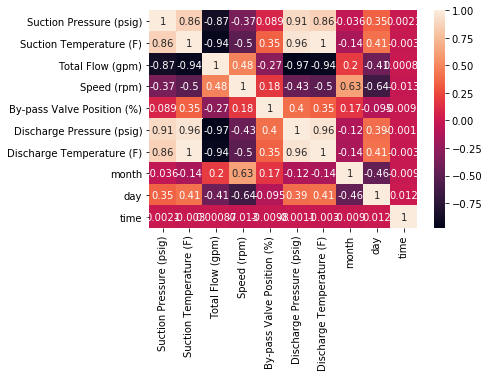

In [20]:
sns.heatmap(corr,annot=True)

# Observations from correlation date above:
# 1).All the attributes are strongly correlated to the test attribute.
# 2).Time is not showing much correlation, so maybe we can drop it. 


# visualizing the trengs graphically

In [21]:
col=['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Temperature (F)', 'month',
       'day', 'time']

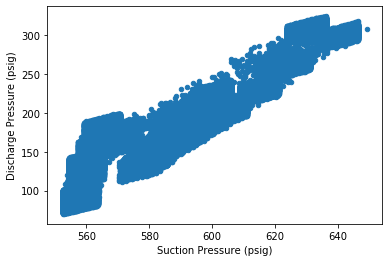

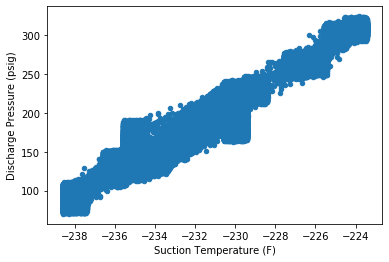

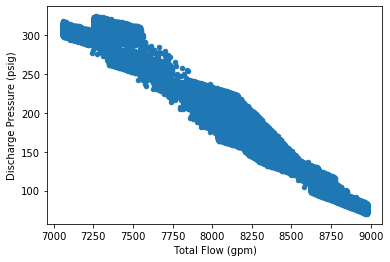

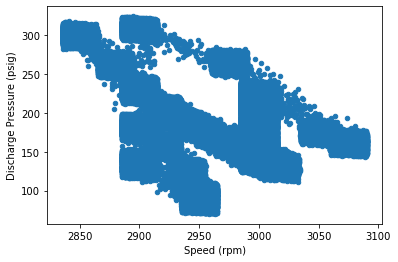

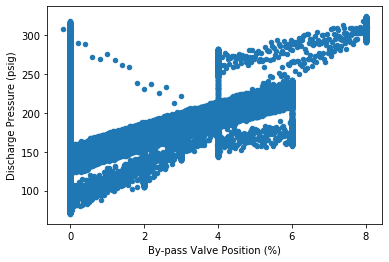

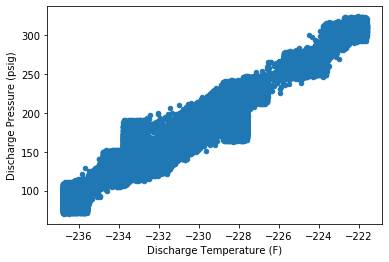

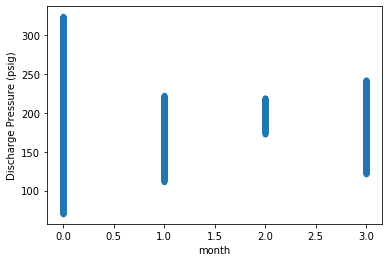

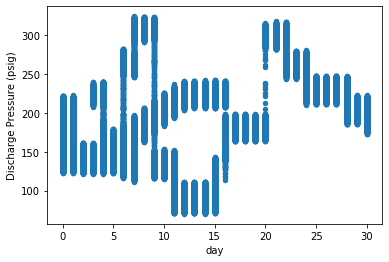

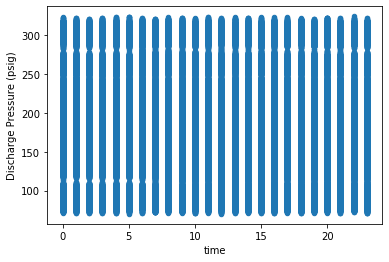

In [22]:
for m in col:
    df.plot.scatter(m,'Discharge Pressure (psig)')

In [23]:
#time vairable is not showing any positive or negative effect on the target variable so I will drop it.
df.drop('time',axis=1,inplace=True)

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler


In [25]:
ss,lr,rfr,dtr=StandardScaler(),LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()


In [26]:
x=df.drop('Discharge Pressure (psig)',axis=1)
y=df.iloc[:,-4].values.reshape(-1,1)

In [27]:
#applying standard scaler on all of the attributes other than the discrete data such as day, month.

scale=['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Temperature (F)']
for m in scale:
    x[m]=ss.fit_transform(x[m].values.reshape(-1,1))

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

# Linear Regression

In [117]:
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.9984613217073802

In [118]:
pred_lr=lr.predict(xtest)
r2=r2_score(pred_lr,ytest)
mse=mean_squared_error(pred_lr,ytest)
print('r2 score is',r2)
print('mse is', mse)
print('rmse is',np.sqrt(mse))
cv=cross_val_score(lr,x,y,cv=10,scoring='r2')
print('cross validation score is',cv.mean())
print('standard deviation of cross validation score is',cv.std())

r2 score is 0.9984436664343789
mse is 4.898999301829854
rmse is 2.2133683158999666
cross validation score is 0.9784117045143743
standard deviation of cross validation score is 0.026033595118515666


# Random Forest Regressor

In [39]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
rfr.score(xtrain,ytrain)

0.9999210886875192

In [41]:
r2_score(rfr.predict(xtest),ytest)

0.9994403888947763

In [42]:
cross_val_score(rfr,x,y,cv=10,n_jobs=-1).mean()

0.8886316719797165

In [43]:
cross_val_score(rfr,x,y,cv=10,n_jobs=-1).std()

0.14984464917748655

In [60]:
pred_rfr=rfr.predict(xtest)

In [63]:
mse_rfr=mean_squared_error(pred_rfr,ytest)
print('mse is',mse_rfr)
print('rmse is',np.sqrt(mse_rfr))


mse is 1.7631913878753547
rmse is 1.3278521709419895


# Decision Tree Regressor

In [44]:
dtr.fit(xtrain,ytrain)
dtr.score(xtrain,ytrain)

0.9999999999999768

In [92]:
pred_dtr=dtr.predict(xtest)
mse_dtr=mean_squared_error(pred_dtr,ytest)
rmse_dtr=np.sqrt(mse)
print('mse is',mse_dtr)
print('rmse is',np.sqrt(mse_dtr))

mse is 3.467755732282073
rmse is 1.8621911105689644


In [45]:
r2_score(dtr.predict(xtest),ytest)

0.9989001126676269

In [46]:
cvd=cross_val_score(dtr,x,y,cv=10,n_jobs=-1)

In [47]:
cvd.mean()

0.8374219697414949

In [48]:
cvd.std()

0.2143350081896

# Artificial Neural Network

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [80]:
classifier= Sequential()

In [81]:
xtrain.shape

(222337, 8)

In [82]:
classifier.add(Dense(output_dim=20, init='uniform', activation='relu',input_dim=8))
classifier.add(Dense(output_dim=25, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=15,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=30,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=25,init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1,init= 'uniform'))
classifier.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [84]:
classifier.fit(xtrain,ytrain, batch_size=500, nb_epoch=600)

Epoch 1/600
222337/222337 [==============================] - 2s 11us/step - loss: 48.0307
Epoch 2/600
222337/222337 [==============================] - 2s 11us/step - loss: 46.8069
Epoch 3/600
222337/222337 [==============================] - 2s 11us/step - loss: 45.1330
Epoch 4/600
222337/222337 [==============================] - 2s 11us/step - loss: 44.0779
Epoch 5/600
222337/222337 [==============================] - 2s 11us/step - loss: 43.2755
Epoch 6/600
222337/222337 [==============================] - 2s 11us/step - loss: 42.2625
Epoch 7/600
222337/222337 [==============================] - 2s 11us/step - loss: 42.0091
Epoch 8/600
222337/222337 [==============================] - 2s 11us/step - loss: 41.0750
Epoch 9/600
222337/222337 [==============================] - 3s 11us/step - loss: 40.5340
Epoch 10/600
222337/222337 [==============================] - 2s 11us/step - loss: 39.8409
Epoch 11/600
222337/222337 [==============================] - 2s 11us/step - loss: 39.5964
Epoch 12

222337/222337 [==============================] - 3s 11us/step - loss: 12.8141
Epoch 92/600
222337/222337 [==============================] - 3s 11us/step - loss: 12.7383
Epoch 93/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.6421
Epoch 94/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.5091
Epoch 95/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.4167
Epoch 96/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.3444
Epoch 97/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.2624
Epoch 98/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.1279
Epoch 99/600
222337/222337 [==============================] - 2s 11us/step - loss: 12.0553
Epoch 100/600
222337/222337 [==============================] - 2s 11us/step - loss: 11.9982
Epoch 101/600
222337/222337 [==============================] - 2s 11us/step - loss: 11.8087
Epoch 102/

222337/222337 [==============================] - 2s 11us/step - loss: 7.5614
Epoch 181/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.5646
Epoch 182/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.4896
Epoch 183/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.4619
Epoch 184/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.4290
Epoch 185/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.3719
Epoch 186/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.3939
Epoch 187/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.3303
Epoch 188/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.2992
Epoch 189/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.2527
Epoch 190/600
222337/222337 [==============================] - 2s 11us/step - loss: 7.2200
Epoch 191/600

222337/222337 [==============================] - 2s 11us/step - loss: 5.7368
Epoch 271/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.7172
Epoch 272/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.7265
Epoch 273/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6720
Epoch 274/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6913
Epoch 275/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6696
Epoch 276/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6407
Epoch 277/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6779
Epoch 278/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6353
Epoch 279/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6345
Epoch 280/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.6151
Epoch 281/600

222337/222337 [==============================] - 2s 11us/step - loss: 5.0341
Epoch 361/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0590
Epoch 362/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0497
Epoch 363/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0316
Epoch 364/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0103
Epoch 365/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0410
Epoch 366/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0413
Epoch 367/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.9979
Epoch 368/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0242
Epoch 369/600
222337/222337 [==============================] - 2s 11us/step - loss: 5.0163
Epoch 370/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.9996
Epoch 371/600

222337/222337 [==============================] - 2s 11us/step - loss: 4.4852
Epoch 451/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4207
Epoch 452/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4542
Epoch 453/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4083
Epoch 454/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4373
Epoch 455/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4054
Epoch 456/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4249
Epoch 457/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.5555
Epoch 458/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4111
Epoch 459/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.4127
Epoch 460/600
222337/222337 [==============================] - 3s 11us/step - loss: 4.3981
Epoch 461/600

222337/222337 [==============================] - 2s 11us/step - loss: 4.0465
Epoch 541/600
222337/222337 [==============================] - 3s 11us/step - loss: 4.0577
Epoch 542/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0392
Epoch 543/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0271
Epoch 544/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0383
Epoch 545/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0115
Epoch 546/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0259
Epoch 547/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0134
Epoch 548/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0018
Epoch 549/600
222337/222337 [==============================] - 2s 11us/step - loss: 4.0210
Epoch 550/600
222337/222337 [==============================] - 3s 11us/step - loss: 4.0146
Epoch 551/600

In [88]:
pred_deep=classifier.predict(xtest)

In [94]:
mse_deep=mean_squared_error(pred_deep,ytest)
rmse_deep=np.sqrt(mse_deep)
print('mse is',mse_deep)
print('rmse is',np.sqrt(mse_deep))

mse is 4.906330040705513
rmse is 2.2150237110932953


In [86]:
r2_score((classifier.predict(xtest)),ytest)

0.9984290447575537

# Graphically comparing the results

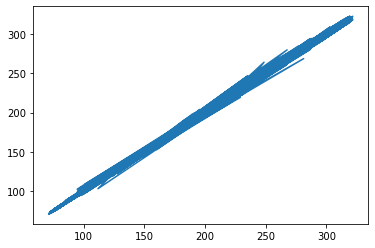

In [89]:
plt.plot(pred_rfr,ytest)

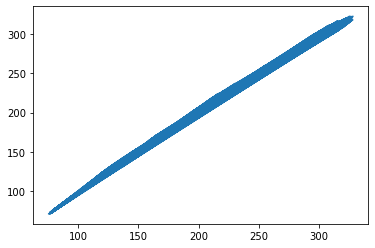

In [90]:
plt.plot(pred_lr,ytest)

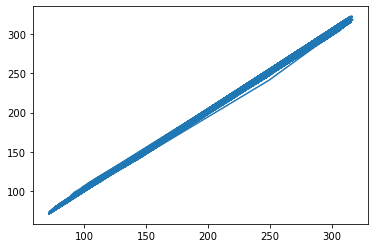

In [91]:
plt.plot(pred_deep,ytest)

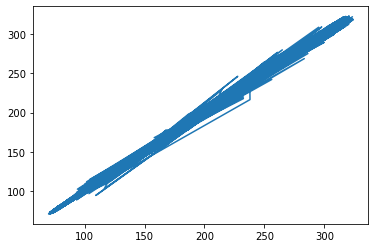

In [95]:
plt.plot(pred_dtr,ytest)

# from the graphs above which are showing the difference between the actual values and the predicted values we can see that deep neural network is working better by a slight margin but at the cost of higher computation cost and even this can be improved by having a more deeper network and running more epochs but that would further increase the cost of computation. Whereas on the other hand random forest and linrea regression have shown very good results which are not very far behind the deep learning results and also training on machine learning algorithms was much faster. 

# final model for predicting the unseen data will be based on the deep learning model. 

# saving the best working model using joblib. Model will be uploaded on the github repository. 

In [112]:
from sklearn.externals import joblib

In [114]:
joblib.dump(classifier,'challenge_problem_1_model.pkl')

['challenge_problem_1_model.pkl']

In [115]:
model=joblib.load('challenge_problem_1_model.pkl')

In [116]:
model.predict(xtest)

array([[179.12253 ],
       [263.29837 ],
       [168.31512 ],
       ...,
       [126.98317 ],
       [138.08    ],
       [ 95.266106]], dtype=float32)